In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
# We'll define a function to draw a nice plot of an SVM

def plot_svc(svc, X, y, h=0.02, pad=0.25):
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
  # Support vectors indicated in plot by vertical lines
  sv = svc.support_vectors_
  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xlabel('X1')
  plt.ylabel('X2') 
  plt.show()
  print('Number of support vectors: ', svc.support_.size)

1. Support Vector Machines

In this lab, we’ll use the SVC module from the sklearn.svm package to demonstrate the support vector classifier and the SVM:

In [ ]:
from sklearn.svm import SVC

2. Support vector Classifier

The SVC() function can be used to fit a support vector classifier when the argument kernel = ”linear” is used. This function uses a slightly different formulation of the equations we saw in lecture to build the support vector classifier. The c argument allows us to specify the cost of a violation to the margin. When the c argument is small, then the margins will be wide and many support vectors will be on the margin or will violate the margin. When the c argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

We can use the SVC() function to fit the support vector classifier for a given value of the cost parameter. Here we demonstrate the use of this function on a two-dimensional example so that we can plot the resulting decision boundary. Let’s start by generating a set of observations, which belong to two classes:

In [ ]:
# Generating random data: 20 observations of 2 features and divide into tw

np.random.seed(42)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] +1

Let’s plot the data to see whether the classes are linearly separable:

Text(0, 0.5, 'X2')

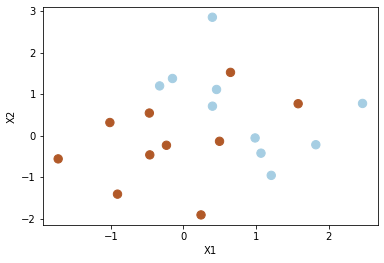

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

Linear or Non Linear?

Next, we fit the support vector classifier:

In [ ]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y)

SVC(C=1, kernel='linear')

We can now plot the support vector classifier by calling the plot_svc() function on the output of the call to SVC(), as well as the data used in the call to SVC():

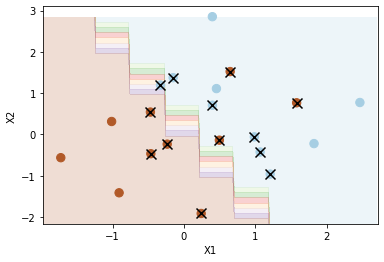

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)

Number of Support vecors?
-> 13

The region of feature space that will be assigned to the 1 class is shown in light blue, and the region that will be assigned to the +1 class is shown in brown. The decision boundary between the two classes is linear (because we used the argument kernel = ”linear”).

The support vectors are plotted with crosses and the remaining observations are plotted as circles; we see here that there are 13 support vectors. We can determine their identities as follows:

In [ ]:
svc.support_

array([11, 13, 14, 16, 18, 19,  0,  1,  2,  3,  4,  5,  6], dtype=int32)

What if we instead used a smaller value of the cost parameter?

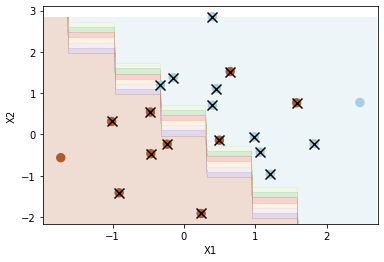

Number of support vectors:  18


In [ ]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)
plot_svc(svc2, X, y)

Number of support vectors?
->18

Now that a smaller value of the c parameter is being used, we obtain a larger number of support vectors, because the margin is now wider.

The sklearn.grid_search module includes a a function GridSearchCV() to perform cross- validation. In order to use this function, we pass in relevant information about the set of models that are under consideration. The following command indicates that we want perform 10-fold cross-validation to compare SVMs with a linear kernel, using a range of values of the cost param- eter:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00107963, 0.00056005, 0.00054786, 0.00057268, 0.00056961,
        0.00057395, 0.00072231]),
 'mean_score_time': array([0.00076985, 0.00030944, 0.00030053, 0.00032761, 0.00031545,
        0.00031328, 0.00031686]),
 'mean_test_score': array([0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 1, 1, 1, 1], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split2_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split3_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

In [ ]:
clf.best_params_

{'C': 0.001}

In [ ]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

In [ ]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,1,11


In [ ]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,1,11


Text(0, 0.5, 'X2')

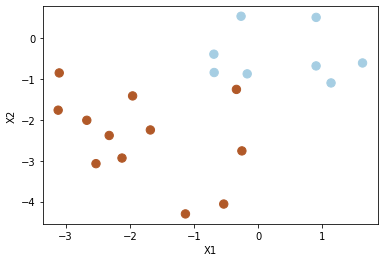

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

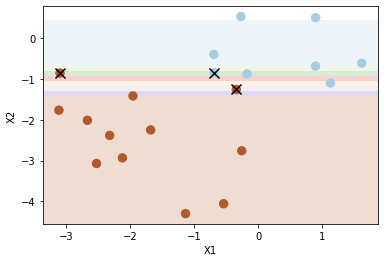

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

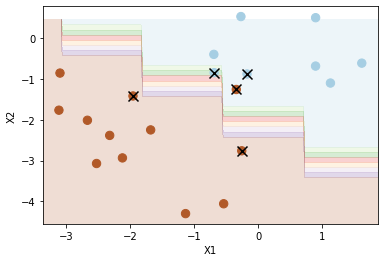

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

# SVM on a dataset

In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csv/dementia_dataset.csv")

In [ ]:
df.shape

(373, 15)

In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
df['SES'].fillna(0)

0      2.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
368    1.0
369    1.0
370    2.0
371    2.0
372    2.0
Name: SES, Length: 373, dtype: float64

In [ ]:
df['MMSE'].fillna(0)

0      27.0
1      30.0
2      23.0
3      28.0
4      22.0
       ... 
368    28.0
369    26.0
370    30.0
371    30.0
372    30.0
Name: MMSE, Length: 373, dtype: float64

In [ ]:
df=df.rename(columns = {'M/F' : 'Gender'})

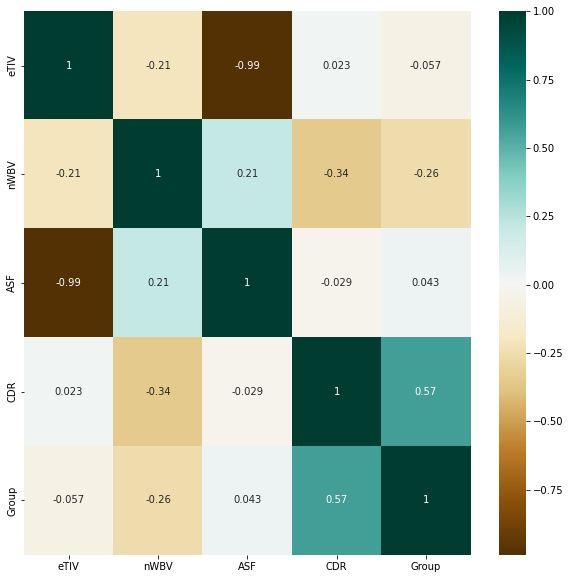

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'BrBG')

In [ ]:
df = df[['eTIV', 'nWBV', 'ASF', 'CDR', 'Group']]
df.head()

,eTIV,nWBV,ASF,CDR,Group
0,1987,0.696,0.883,0.0,Nondemented
1,2004,0.681,0.876,0.0,Nondemented
2,1678,0.736,1.046,0.5,Demented
3,1738,0.713,1.010,0.5,Demented
4,1698,0.701,1.034,0.5,Demented


In [ ]:
Demented = df[df['CDR'] == 0.5]
NonDemented = df[df['CDR'] == 0.0]

In [ ]:
df.Group[df.Group == 'Nondemented'] = 1
df.Group[df.Group == 'Demented'] = 2
df.Group[df.Group == 'Converted'] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['Group'] = df['Group'].astype(int)

In [ ]:
#split data
X = df.drop('Group', axis = 1)
y = df['Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(261, 4)
(261,)
(112, 4)
(112,)


In [ ]:
svm = SVC(kernel = 'linear', gamma = 'auto', C = 2)
svm.fit(X_train, y_train)
print(svm)

SVC(C=2, gamma='auto', kernel='linear')


In [ ]:
y_pred = svm.predict(X_test)
print(y_pred)

[2 1 1 1 1 2 2 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 2 2 1 1 2 1 2 2 2 2 1 2 2 1 1
 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 2 2 1 2 1 2 2 1 2 2 1 1 2 1 1 2 1 2 2 2 1
 2 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 2 2 2 1 2 2 2 1 2 1 1 2 2 2 1 2 2 2 1 2 2
 1]


In [ ]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.9107142857142857
Percentage :  91 %


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('Root Mean Squared Error : ', rmse)

Root Mean Squared Error :  0.44320263021395917


In [ ]:
matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
print(matrix)

Predicted   1   2
Actual           
1          56   0
2           0  46
3           4   6


In [ ]:
#classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        56
           2       0.88      1.00      0.94        46
           3       0.00      0.00      0.00        10

    accuracy                           0.91       112
   macro avg       0.61      0.67      0.63       112
weighted avg       0.83      0.91      0.87       112



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM is a prominent Supervised Learning technique that may be used to solve both classification and regression issues. The SVM algorithm's purpose is to find the optimum line or decision boundary for categorising n-dimensional space into classes so that additional data points may be readily placed in the proper category in the future.
I discovered that accuracy is 91 percent after analysing the confusion matrix.
There are 56 True Positives and 46 False Negatives. There are 10 from class 3 that were predicted. After trying all of the kernel approaches, I discovered that 'linear' was the best kernel.